<a href="https://colab.research.google.com/github/rebeccajanuario/EstatisticaDividascomPython/blob/main/Estatistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Como projeto de disciplina, é requerido a implementação em Python dos
conceitos estatísticos vistos em sala como: Média, mediana, população e des-
vio padrão. Para isso, foi compartilhado no tópico da atividade o dataset de
dívidas de cartão de crédito contendo os dados. O dataset contem três colu-
nas como: income, age e loan (renda, idade, empréstimo). Após o algoritmo
carregar a base de dados, deverá ter as seguintes saídas:
• Dados da estatística descritiva das colunas income, age e loan

• Curva de Distribuição Cumulativa das Dívidas


• Matriz de Correlação de Calor das colunas income, age e loan

Para cada saída, descrever e explicar os conceitos em uma célula. O trabalho
deve ser feito no Google Colab e compartilhado como entrega da atividade
no Google Classroom.

In [82]:
pip install pandas numpy matplotlib seaborn


/usr/local/lib/python3.10/dist-packages/gdown/parse_url.py:35: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=None
  warnings.warn(
Downloading...
From: https://docs.google.com/spreadsheets/d/1uAQSOqcDJiLSNQwz1RktIARfEQyuhDU0F1maQ18SUUM/export?format=csv
To: /content/dados.csv
93.5kB [00:00, 11.8MB/s]


   clientid         income            age           loan
0         1    661.559.251  5.901.701.507  8.106.532.131
1         2  3.441.515.397    481.171.531  6.564.745.018
2         3  5.731.717.006  6.310.804.949  8.020.953.296
3         4    427.095.342  4.575.197.235    610.364.226
4         5  6.695.268.885  1.858.433.593  8.770.099.235

Dados da Estatística Descritiva:
             income           age          loan
count  1.997000e+03  1.997000e+03  1.997000e+03
mean   4.097532e+09  3.722214e+09  4.126302e+09
std    1.862482e+09  1.685733e+09  2.640800e+09
min    6.427270e+05  5.383952e+06  5.809899e+06
25%    2.845171e+09  2.567958e+09  1.793750e+09
50%    4.296599e+09  3.847892e+09  3.853088e+09
75%    5.627541e+09  5.138822e+09  6.095309e+09
max    6.999569e+09  6.397180e+09  9.971842e+09


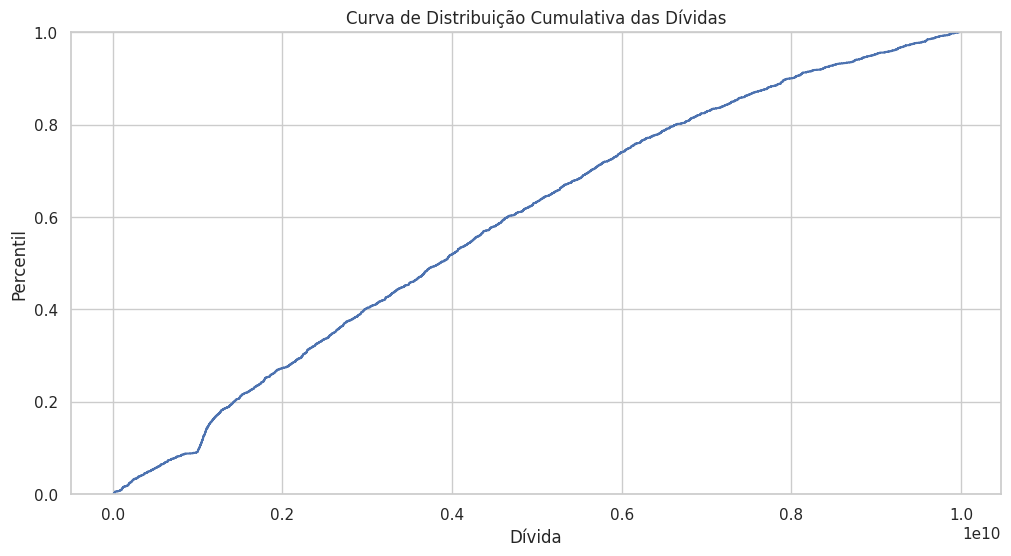

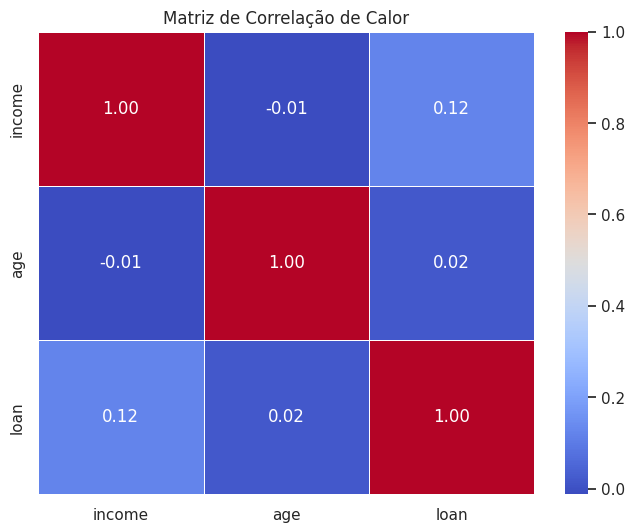

In [81]:
import pandas as pd
import gdown
import seaborn as sns
import matplotlib.pyplot as plt

# URL do Google Sheets (compartilhamento para visualização)
url = "https://docs.google.com/spreadsheets/d/1uAQSOqcDJiLSNQwz1RktIARfEQyuhDU0F1maQ18SUUM/export?format=csv"

# Baixar o CSV do Google Sheets
output = 'dados.csv'
gdown.download(url, output, quiet=False)

# Carregar dados do CSV
df = pd.read_csv(output)

# Visualizar as primeiras linhas do DataFrame
print(df.head())

# Limpeza dos dados - remover caracteres não numéricos e converter para float
def clean_numeric(value):
    try:
        # Remover pontos e espaços e converter para float
        return float(''.join(char for char in str(value) if char.isdigit() or char == '-'))
    except ValueError:
        return None

# Aplicar a função de limpeza aos dados
df['income'] = df['income'].apply(clean_numeric)
df['age'] = df['age'].apply(clean_numeric)
df['loan'] = df['loan'].apply(clean_numeric)

# Dados da estatística descritiva para as colunas income, age e loan
desc_stats = df[['income', 'age', 'loan']].describe()
print("\nDados da Estatística Descritiva:")
print(desc_stats)

# Curva de Distribuição Cumulativa das Dívidas
plt.figure(figsize=(12, 6))
sns.ecdfplot(df['loan'])
plt.title('Curva de Distribuição Cumulativa das Dívidas')
plt.xlabel('Dívida')
plt.ylabel('Percentil')
plt.show()

# Matriz de Correlação de Calor
correlation_matrix = df[['income', 'age', 'loan']].corr()

# Plotar a matriz de correlação de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação de Calor')
plt.show()
